<a href="https://colab.research.google.com/github/fernandoczen/projeto-AREE-ebanx/blob/main/projeto_AREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Instalando dependências

In [ ]:
!pip install basedosdados -q
!pip install basedosdados[upload] -q

import basedosdados as bd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.50.0 requires tomlkit<0.14.0,>=0.12.0, but you have tomlkit 0.11.8 which is incompatible.
google-adk 1.19.0 requires google-cloud-storage<4.0.0,>=3.0.0, but you have google-cloud-storage 2.19.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True);

Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4
import os
os._exit(0)  #testandoooooooooooooooooo

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.14.0 requires scikit-learn<2,>=1.4.2, but you have scikit-learn 1.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12

# 2 - Autenticação

In [ ]:
from google.colab import auth
from google.cloud import bigquery
project_id = 'ebanx-analise-renda-evasao';

# Autentica o usuário
auth.authenticate_user(clear_output = True, project_id= project_id);
##client = bigquery.Client(project=project_id);

#3 - Importando base de dados

In [ ]:
## Base de dados referentes a dados de renda.
database_renda_pnad = bd.read_sql(''' WITH
dicionario_V1022 AS (
    SELECT
        chave AS chave_V1022,
        valor AS descricao_V1022
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'V1022'
        AND id_tabela = 'rendimentos_outras_fontes'
),
dicionario_V1023 AS (
    SELECT
        chave AS chave_V1023,
        valor AS descricao_V1023
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'V1023'
        AND id_tabela = 'rendimentos_outras_fontes'
),
dicionario_VD5006 AS (
    SELECT
        chave AS chave_VD5006,
        valor AS descricao_VD5006
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'VD5006'
        AND id_tabela = 'rendimentos_outras_fontes'
)
SELECT
    dados.ano as ano,
    dados.id_domicilio as id_domicilio,
    dados.id_pessoa as id_pessoa,
    descricao_V1022 AS V1022,
    descricao_V1023 AS V1023,
    dados.V2001 as V2001,
    descricao_VD5006 AS VD5006
FROM `basedosdados.br_ibge_pnadc.rendimentos_outras_fontes` AS dados
LEFT JOIN `dicionario_V1022`
    ON dados.V1022 = chave_V1022
LEFT JOIN `dicionario_V1023`
    ON dados.V1023 = chave_V1023
LEFT JOIN `dicionario_VD5006`
    ON dados.VD5006 = chave_VD5006''', billing_project_id=project_id, reauth=True);

BaseDosDadosAccessDeniedException: 
Are you sure you are using the right `billing_project_id`?
You must use the Project ID available in your Google Cloud console home page at https://console.cloud.google.com/home/dashboard
If you still don't have a Google Cloud Project, you have to create one.
You can set one up by following these steps: 
1. Go to this link https://console.cloud.google.com/projectselector2/home/dashboard
2. Agree with Terms of Service if asked
3. Click in Create Project
4. Put a cool name in your project
5. Hit create
6. Rerun this command with the flag `reauth=True`. 
   Like `read_table('br_ibge_pib', 'municipios', billing_project_id=<YOUR_PROJECT_ID>, reauth=True)`

In [ ]:
## Base de dados referente a dados educacionais.

database_educacao_pnad = bd.read_sql (''' SELECT
    dados.id_pessoa as id_pessoa,
    dados.V3002 as V3002,
    dados.V3002A as V3002A,
    dados.V3006 as V3006,
    dados.V3008 as V3008,
    dados.V3034 as V3034,
    dados.V3034A as V3034A
FROM `basedosdados.br_ibge_pnadc.educacao` AS dados ''')

Downloading: 100%|██████████|


In [ ]:
## Base de dados referente a dados pessoais.

database_pessoal_pnad = bd.read_sql('''WITH
dicionario_V2007 AS (
    SELECT
        chave AS chave_V2007,
        valor AS descricao_V2007
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'V2007'
        AND id_tabela = 'microdados'
),
dicionario_V2010 AS (
    SELECT
        chave AS chave_V2010,
        valor AS descricao_V2010
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'V2010'
        AND id_tabela = 'microdados'
)
SELECT
    dados.id_pessoa as id_pessoa,
    descricao_V2007 AS V2007,
    dados.V2009 as V2009,
    descricao_V2010 AS V2010
FROM `basedosdados.br_ibge_pnadc.microdados` AS dados
LEFT JOIN `dicionario_V2007`
    ON dados.V2007 = chave_V2007
LEFT JOIN `dicionario_V2010`
    ON dados.V2010 = chave_V2010''')

GenericGBQException: Reason: 404 POST https://bigquery.googleapis.com/bigquery/v2/projects//queries?prettyPrint=false: Request couldn't be served.

# 4 - Tratamento de tabela
 Nessa seção, utiliza-se principalmente o Pandas para fazer o tratamento de tabelas.

In [ ]:
database_renda_pnad.info()
database_renda_pnad.head()
database_renda_pnad = database_renda_pnad.rename(columns={
    'V1022':'situacao_domicilio',
    'V1023': 'tipo_de_area',
    'V2001':'n_pessoas_domicilio',
    'VD5006':'faixa_salarial'});
database_renda_pnad.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429834 entries, 0 to 1429833
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ano           1429834 non-null  Int64 
 1   id_domicilio  1429834 non-null  object
 2   id_pessoa     1429834 non-null  object
 3   V1022         1429834 non-null  object
 4   V1023         1429834 non-null  object
 5   V2001         1429834 non-null  Int64 
 6   VD5006        942719 non-null   object
dtypes: Int64(2), object(5)
memory usage: 79.1+ MB


,ano,id_domicilio,id_pessoa,situacao_domicilio,tipo_de_area,n_pessoas_domicilio,faixa_salarial
0,2013,1100001530303,110000153030302,Urbana,Capital,4,None
1,2013,1100001530303,110000153030303,Urbana,Capital,4,None
2,2013,1100001530403,110000153040301,Urbana,Capital,2,None
3,2013,1100001530603,110000153060304,Urbana,Capital,4,None
4,2013,1100001530603,110000153060303,Urbana,Capital,4,None


In [ ]:
database_educacao_pnad.info()
database_educacao_pnad.head()
database_educacao_pnad = database_educacao_pnad.rename(columns={
    'V3002':'frequenta_escola',
    'V3002A':'tipo_escola',
    'V3006':'serie',
    'V3008':'frequentou_escola',
    'V3034':'motivo_nao_frequenta',
    'V3034A':'idade_frequentou'
})
database_educacao_pnad.info()

NameError: name 'database_educacao_pnad' is not defined

In [ ]:
database_pessoal_pnad = database_pessoal_pnad.rename(columns={
    'V2007':'sexo',
    'V2009':'idade',
    'V2010':'cor_raca'})
database_pessoal_pnad.head()

ModuleNotFoundError: No module named 'numpy.rec'

ModuleNotFoundError: No module named 'numpy.rec'

In [ ]:
database_final = pd.merge(database_pessoal_pnad, database_educacao_pnad, on='id_pessoa', how='inner');
database_final = pd.merge(database_final, database_renda_pnad, on='id_pessoa', how='inner');


In [ ]:
database_final = database_final.drop(columns={
    'id_domicilio',
    'tipo_escola' })

In [ ]:
### database_final = database_final.drop(columns={
##    'id_domicilio',
#    'tipo_escola' })
database_final_EM = database_final[database_final['idade'] > 14];
database_final_EM = database_final_EM[database_final_EM['idade'] < 19];

In [ ]:
database_final_EM.loc[database_final_EM['frequenta_escola'] == 2, 'frequenta_escola'] = 0
database_final_EM.loc[database_final_EM['frequentou_escola'] == 2, 'frequentou_escola'] = 0
##dataset_original = dataset_original.rename(columns={'faixa_salarial':'classe_renda'})
##dataset_original = dataset_original.rename(columns={'classe_renda':'faixa_salarial'})
dataset_final_limpo = database_final_EM.dropna(subset=['frequenta_escola','faixa_salarial']);
dataset_final_limpo.info()
dataset_final_limpo.info()

NameError: name 'database_final_EM' is not defined

In [ ]:
dataset_final_limpo.head()

NameError: name 'dataset_final_limpo' is not defined

# 5 - Exportação como CSV

In [ ]:
dataset_final_limpo.to_csv("dataset_completo.csv")

NameError: name 'dataset_final_limpo' is not defined

# 6 - Limpeza, tratamento e filtro de tabelas

In [ ]:
dataset_original = pd.read_csv("/content/drive/MyDrive/EBANX-AREE/dataset_completo.csv");
dataset_original.loc[dataset_original['frequenta_escola'] == 2, 'frequenta_escola'] = 0
dataset_original.loc[dataset_original['frequentou_escola'] == 2, 'frequentou_escola'] = 0
dataset_original.head(30)

## Supomos que, por haver uma faixa de idade, a 1 série é do 1 ano do ensino médio, por exemplo.

,Unnamed: 0,id_pessoa,sexo,idade,cor_raca,frequenta_escola,serie,frequentou_escola,motivo_nao_frequenta,idade_frequentou,ano,situacao_domicilio,tipo_de_area,n_pessoas_domicilio,faixa_salarial
0,54131,350718140020703,Homem,15,Branca,1,1.0,NaN,NaN,NaN,2018,Rural,"Resto da UF (Unidade da Federação, excluindo ...",4,Mais de 2 até 3 salários mínimos
1,54132,350683177060703,Homem,15,Branca,1,1.0,NaN,NaN,NaN,2018,Urbana,"Resto da RM (Região Metropolitana, excluindo a...",4,Mais de 1 até 2 salários mínimos
2,54133,350723601020703,Mulher,15,Preta,1,1.0,NaN,NaN,NaN,2018,Rural,"Resto da UF (Unidade da Federação, excluindo ...",4,"Mais de 0,5 até 1 salário mínimo"
3,54134,350723601020703,Mulher,15,Preta,1,9.0,NaN,NaN,NaN,2018,Rural,"Resto da UF (Unidade da Federação, excluindo ...",4,"Mais de 0,5 até 1 salário mínimo"
4,54135,350612160120703,Mulher,15,Branca,0,NaN,1.0,NaN,17.0,2019,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",4,Mais de 1 até 2 salários mínimos
5,54136,350612160120703,Mulher,15,Branca,0,NaN,1.0,NaN,17.0,2020,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",4,Mais de 1 até 2 salários mínimos
6,54137,170032801041003,Mulher,15,Parda,1,6.0,NaN,NaN,NaN,2022,Urbana,Capital,3,"Até 0,25 salário mínimo"
7,54138,240072898131002,Homem,15,Parda,1,6.0,NaN,NaN,NaN,2022,Rural,"Resto da RM (Região Metropolitana, excluindo a...",2,"Até 0,25 salário mínimo"
8,54139,250095899071003,Mulher,15,Parda,1,8.0,NaN,NaN,NaN,2022,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",3,"Mais de 0,25 até 0,5 salário mínimo"
9,54140,230215479101003,Homem,15,Parda,1,1.0,NaN,NaN,NaN,2022,Rural,"Resto da UF (Unidade da Federação, excluindo ...",3,"Mais de 0,5 até 1 salário mínimo"


In [ ]:
dataset_original.to_csv("dataset_completo.csv")

###6.1 - Primeira tabela localizada: tabela de relação entre variáveis frequenta_escola e faixa_salarial.

In [ ]:
classes = dataset_original['faixa_salarial'].unique()
print(classes)

dataset_localizado1 = pd.DataFrame(
    columns=['Frequenta', 'NFrequenta'],
    index=[f"{classes[0]}", f"{classes[1]}", f"{classes[2]}", f"{classes[3]}", f"{classes[4]}", f"{classes[5]}", f"{classes[6]}"]);
dataset_localizado1.index.name = "Renda";
dataset_localizado1.sort_index(inplace=True);
print(dataset_localizado1)

['Mais de 2 até 3 salários mínimos' 'Mais de 1 até 2 salários mínimos'
 'Mais de 0,5 até 1 salário mínimo' 'Até 0,25 salário mínimo'
 'Mais de 0,25 até 0,5 salário mínimo' 'Mais de 5 salários mínimos'
 'Mais de 3 até 5 salários mínimos']
                                    Frequenta NFrequenta
Renda                                                   
Até 0,25 salário mínimo                   NaN        NaN
Mais de 0,25 até 0,5 salário mínimo       NaN        NaN
Mais de 0,5 até 1 salário mínimo          NaN        NaN
Mais de 1 até 2 salários mínimos          NaN        NaN
Mais de 2 até 3 salários mínimos          NaN        NaN
Mais de 3 até 5 salários mínimos          NaN        NaN
Mais de 5 salários mínimos                NaN        NaN


In [ ]:

contagem = (
    dataset_original
    .groupby(['faixa_salarial', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
)

contagem = contagem.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
})

dataset_localizado1[['Frequenta', 'NFrequenta']] = (
    contagem.reindex(index=dataset_localizado1.index)[['Frequenta', 'NFrequenta']]
)

dataset_localizado1['Total'] = (
    dataset_localizado1['Frequenta'] + dataset_localizado1['NFrequenta']
)
dataset_localizado1.loc['Total'] = dataset_localizado1.sum(numeric_only=True)


print(dataset_localizado1)


                                     Frequenta  NFrequenta   Total
Renda                                                             
Até 0,25 salário mínimo                  26199        7918   34117
Mais de 0,25 até 0,5 salário mínimo      27902        8179   36081
Mais de 0,5 até 1 salário mínimo         28453        8607   37060
Mais de 1 até 2 salários mínimos         15621        4226   19847
Mais de 2 até 3 salários mínimos          3968         811    4779
Mais de 3 até 5 salários mínimos          2361         409    2770
Mais de 5 salários mínimos                1204         201    1405
Total                                   105708       30351  136059


In [ ]:
## EXPORTANDO TABELA FILTRADA - RENDA POR EVASAO.

dataset_localizado1.to_csv("dataset_renda_evasao.csv")

###6.2 - Segunda tabela localizada: reunião de características em comum para criação de perfil do estudante evasor

In [ ]:
dataset_localizado2 = dataset_original[dataset_original['frequenta_escola'] == 0]
dataset_localizado2.head(30)

,Unnamed: 0,id_pessoa,sexo,idade,cor_raca,frequenta_escola,serie,frequentou_escola,motivo_nao_frequenta,idade_frequentou,ano,situacao_domicilio,tipo_de_area,n_pessoas_domicilio,faixa_salarial
4,54135,350612160120703,Mulher,15,Branca,0,NaN,1.0,NaN,17.0,2019,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",4,Mais de 1 até 2 salários mínimos
5,54136,350612160120703,Mulher,15,Branca,0,NaN,1.0,NaN,17.0,2020,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",4,Mais de 1 até 2 salários mínimos
18,54149,520072537080702,Mulher,15,Parda,0,NaN,1.0,NaN,NaN,2018,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",4,Mais de 1 até 2 salários mínimos
38,54169,270027622120603,Homem,15,Parda,0,NaN,1.0,NaN,NaN,2017,Rural,"Resto da UF (Unidade da Federação, excluindo ...",5,"Mais de 0,25 até 0,5 salário mínimo"
119,54253,290207963130503,Homem,15,Parda,0,NaN,1.0,11.0,NaN,2016,Rural,"Resto da UF (Unidade da Federação, excluindo ...",4,"Mais de 0,5 até 1 salário mínimo"
132,54266,510049682031001,Mulher,15,Parda,0,NaN,1.0,NaN,14.0,2022,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",3,"Mais de 0,25 até 0,5 salário mínimo"
145,54279,350604440030504,Homem,15,Branca,0,NaN,1.0,12.0,NaN,2016,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",5,"Mais de 0,5 até 1 salário mínimo"
174,54313,430271996011002,Mulher,15,Branca,0,NaN,1.0,NaN,19.0,2022,Urbana,"Resto da RM (Região Metropolitana, excluindo a...",4,"Mais de 0,5 até 1 salário mínimo"
189,54328,260135190101002,Mulher,15,Parda,0,NaN,1.0,NaN,NaN,2022,Rural,"Resto da UF (Unidade da Federação, excluindo ...",4,"Mais de 0,25 até 0,5 salário mínimo"
215,54354,310359440090504,Homem,15,Parda,0,NaN,1.0,13.0,NaN,2016,Rural,"Resto da RM (Região Metropolitana, excluindo a...",6,Mais de 1 até 2 salários mínimos


###6.3 - Terceira tabela localizada: tabela de relação entre variáveis frequenta_escola e cor_raca.

In [ ]:
races = dataset_original['cor_raca'].unique();
print(races);

dataset_localizado3 = pd.DataFrame(
    columns=['Frequenta', 'NFrequenta'],
    index=races);
dataset_localizado3.index.name = "Cor/Raça";

contagem_raca = (
    dataset_original
    .groupby(['cor_raca', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
);

contagem_raca = contagem_raca.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
});

dataset_localizado3[['Frequenta', 'NFrequenta']] = (
    contagem_raca.reindex(index=dataset_localizado3.index)[['Frequenta', 'NFrequenta']]
);

dataset_localizado3['Total'] = (
    dataset_localizado3['Frequenta'] + dataset_localizado3['NFrequenta']
);
dataset_localizado3.loc['Total'] = dataset_localizado3.sum(numeric_only=True);

print(dataset_localizado3);

['Branca' 'Preta' 'Parda' 'Indígena' 'Amarela' 'Ignorado']
          Frequenta  NFrequenta   Total
Cor/Raça                               
Branca        31247        8119   39366
Preta          7721        2299   10020
Parda         65638       19581   85219
Indígena        705         244     949
Amarela         390         108     498
Ignorado          7           0       7
Total        105708       30351  136059


###6.4 - Quarta tabela localizada: tabela de relação entre variavéis frequenta_escola e situacao_domicilio

In [ ]:
situacao_domicilio_labels = dataset_original['situacao_domicilio'].unique();
print(situacao_domicilio_labels);

dataset_localizado4 = pd.DataFrame(
    columns=['Frequenta', 'NFrequenta'],
    index=situacao_domicilio_labels);
dataset_localizado4.index.name = "Situacao_Domicilio";

contagem_situacao = (
    dataset_original
    .groupby(['situacao_domicilio', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
);

contagem_situacao = contagem_situacao.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
});

dataset_localizado4[['Frequenta', 'NFrequenta']] = (
    contagem_situacao.reindex(index=dataset_localizado4.index)[['Frequenta', 'NFrequenta']]
);

dataset_localizado4['Total'] = (
    dataset_localizado4['Frequenta'] + dataset_localizado4['NFrequenta']
);
dataset_localizado4.loc['Total'] = dataset_localizado4.sum(numeric_only=True);

print(dataset_localizado4);

['Rural' 'Urbana']
                    Frequenta  NFrequenta   Total
Situacao_Domicilio                               
Rural                   32965       10159   43124
Urbana                  72743       20192   92935
Total                  105708       30351  136059


###6.5 - Quinta tabela localizada: tabela de relação entre variavéis frequenta_escola,  contagem_sexo (absoluto) e contagem_sexo_perc(proporção em porcentagem)

In [ ]:
contagem_sexo = (
    dataset_original
    .groupby(['sexo', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
)

contagem_sexo = contagem_sexo.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
})

contagem_sexo['Total'] = contagem_sexo['Frequenta'] + contagem_sexo['NFrequenta']

contagem_sexo_perc = contagem_sexo.div(contagem_sexo['Total'], axis=0) * 100

print("Tabela de Contagem (Absoluto):")
print(contagem_sexo)
print("\nTabela de Proporções (%):")
print(contagem_sexo_perc)

Tabela de Contagem (Absoluto):
frequenta_escola  NFrequenta  Frequenta  Total
sexo                                          
Homem                  15550      55259  70809
Mulher                 14801      50449  65250

Tabela de Proporções (%):
frequenta_escola  NFrequenta  Frequenta  Total
sexo                                          
Homem              21.960485  78.039515  100.0
Mulher             22.683525  77.316475  100.0


# 7 - Visualização de dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###7.1 - Comparação entre Frequência e Não Frequência na Escola por Faixa Salarial

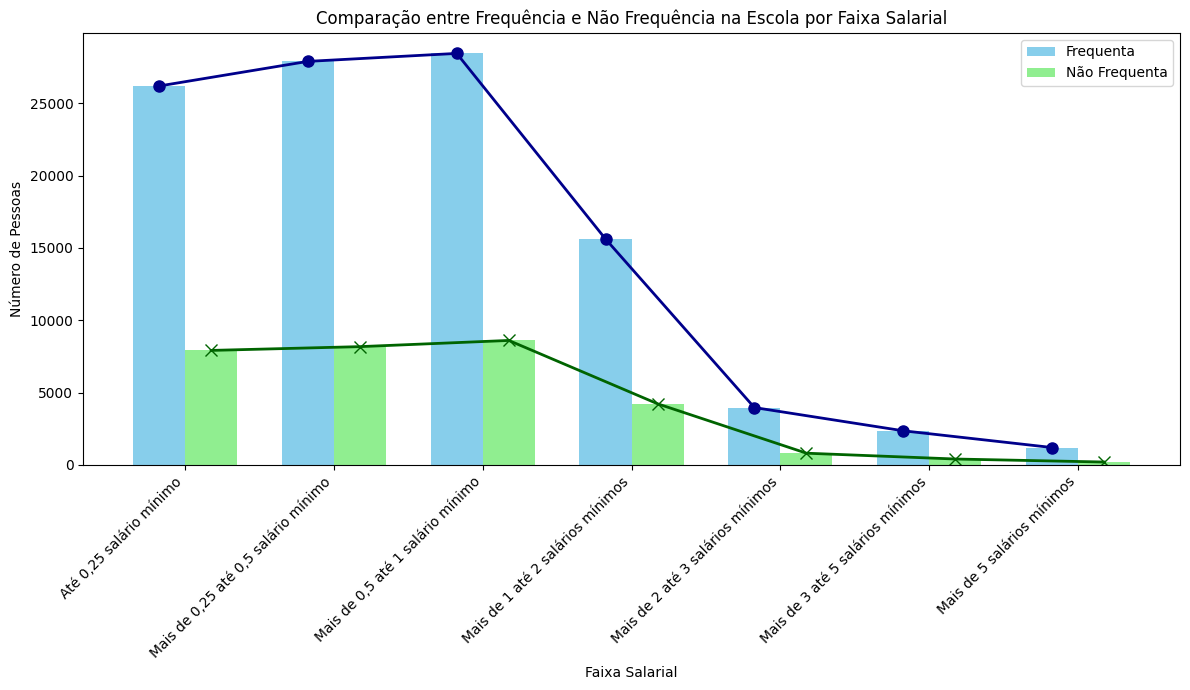

In [ ]:
y_labels = dataset_localizado1.index[:-1].tolist()
indice = np.arange(len(y_labels));
larg_barra = 0.35;

x1_data = dataset_localizado1['Frequenta'][:-1];
x2_data = dataset_localizado1['NFrequenta'][:-1];

fig, ax = plt.subplots(figsize=(12, 7));

retas_grupo1 = ax.bar(indice - larg_barra/2, x1_data, larg_barra, label='Frequenta', color='skyblue')
retas_grupo2 = ax.bar(indice + larg_barra/2, x2_data, larg_barra, label='Não Frequenta', color='lightgreen')

ax.plot(indice - larg_barra/2, x1_data, marker='o', color='darkblue', linestyle='-', linewidth=2, markersize=8)
ax.plot(indice + larg_barra/2, x2_data, marker='x', color='darkgreen', linestyle='-', linewidth=2, markersize=8)

ax.set_xticks(indice)
ax.set_xticklabels(y_labels, rotation=45, ha='right')

ax.set_xlabel("Faixa Salarial")
ax.set_ylabel("Número de Pessoas")
ax.set_title("Comparação entre Frequência e Não Frequência na Escola por Faixa Salarial")

ax.legend()
plt.tight_layout()
plt.savefig("FeNF por Renda.png")
plt.show()

1. Predominância da Frequência: Em todas as faixas salariais, o número de indivíduos que frequentam a escola é consistentemente maior do que o número de indivíduos que não frequentam. Isso reforça a alta taxa geral de escolaridade na faixa etária de 15-18 anos.

2. Relação Inversa com a Renda: Nota-se uma tendência clara de que a proporção de pessoas que não frequentam a escola diminui à medida que a faixa salarial aumenta. Isso sugere que menores rendimentos domiciliares estão associados a uma maior probabilidade de não frequentar a escola.

    * Faixas de Baixa Renda: Nas faixas 'Até 0,25 salário mínimo', 'Mais de 0,25 até 0,5 salário mínimo' e 'Mais de 0,5 até 1 salário mínimo', a proporção de não frequentadores é significativamente maior (aproximadamente 23% a 25% do total em cada faixa). Essas faixas também concentram o maior número absoluto de não frequentadores.

    * Faixas de Alta Renda: Nas faixas 'Mais de 3 até 5 salários mínimos' e 'Mais de 5 salários mínimos', a proporção de não frequentadores cai para cerca de 14% a 16% do total de indivíduos nessas categorias.

3. Maior Número Absoluto de Não Frequentadores em Rendas Médio-Baixas: Embora a proporção de não frequência seja alta nas rendas mais baixas, o maior número absoluto de indivíduos que não frequentam a escola está concentrado nas faixas de 'Até 0,25 salário mínimo' (7918 pessoas), 'Mais de 0,25 até 0,5 salário mínimo' (8179 pessoas) e 'Mais de 0,5 até 1 salário mínimo' (8607 pessoas). Isso indica que, mesmo que a proporção não seja a mais alta, o volume de evasão nessas categorias é substancial.


Esses dados sublinham a forte correlação entre a renda familiar e a frequência escolar, apontando para a necessidade de políticas de suporte financeiro e educacional para famílias de menor renda a fim de combater a evasão escolar.

###7.2 - Comparação entre Frequência e Não Frequência na Escola por Cor/Raça

In [ ]:
races_labels = dataset_localizado3.index[:-1].tolist();
indice = np.arange(len(races_labels));
larg_barra = 0.35;

x1_data_raca = dataset_localizado3['Frequenta'][:-1];
x2_data_raca = dataset_localizado3['NFrequenta'][:-1];

fig, ax = plt.subplots(figsize=(12, 7));

retas_grupo1_raca = ax.bar(indice - larg_barra/2, x1_data_raca, larg_barra, label='Frequenta', color='skyblue');
retas_grupo2_raca = ax.bar(indice + larg_barra/2, x2_data_raca, larg_barra, label='Não Frequenta', color='lightgreen');

ax.plot(indice - larg_barra/2, x1_data_raca, marker='o', color='darkblue', linestyle='-', linewidth=2, markersize=8);
ax.plot(indice + larg_barra/2, x2_data_raca, marker='x', color='darkgreen', linestyle='-', linewidth=2, markersize=8);

ax.set_xticks(indice);
ax.set_xticklabels(races_labels, rotation=45, ha='right');

ax.set_xlabel("Cor/Raça");
ax.set_ylabel("Número de Pessoas");
ax.set_title("Comparação entre Frequência e Não Frequência na Escola por Cor/Raça");

ax.legend();
plt.tight_layout();

plt.show();

1. Predominância da Frequência:
Em todas as categorias raciais, o número de indivíduos que frequentam a escola é consideravelmente maior do que o número de indivíduos que não frequentam. Isso sugere uma alta taxa geral de escolaridade para a faixa etária analisada (15-18 anos).

2. Grupos Mais Representados:
As populações 'Parda' e 'Branca' são os grupos mais numerosos, tanto no total de pessoas quanto na distribuição entre frequentadores e não frequentadores da escola.

3. Disparidades Proporcionais na Não Frequência:
    * A população Indígena apresenta a maior proporção de não frequência escolar, cerca de 25.71% dos indivíduos deste grupo não frequentam a escola. Isso indica uma possível vulnerabilidade ou desafios específicos para este grupo em relação ao acesso ou permanência escolar.
    * As populações Parda e Preta também mostram proporções de não frequência similares (aproximadamente 22.9%).
    * As populações Branca e Amarela têm proporções de não frequência ligeiramente menores (cerca de 20.6% e 21.7%, respectivamente) em comparação com os grupos Parda, Preta e Indígena.


Esses dados destacam a importância de analisar as taxas de evasão escolar não apenas em números absolutos, mas também proporcionalmente dentro de cada grupo racial para identificar as maiores necessidades e direcionar políticas públicas.

###7.3 - Comparação entre Frequência e Não Frequência na Escola por Situação do Domicílio

In [ ]:
situacao_domicilio_labels = dataset_localizado4.index[:-1].tolist();
indice = np.arange(len(situacao_domicilio_labels));
larg_barra = 0.35;

x1_data_situacao = dataset_localizado4['Frequenta'][:-1];
x2_data_situacao = dataset_localizado4['NFrequenta'][:-1];

fig, ax = plt.subplots(figsize=(10, 6));

retas_grupo1_situacao = ax.bar(indice - larg_barra/2, x1_data_situacao, larg_barra, label='Frequenta', color='skyblue');
retas_grupo2_situacao = ax.bar(indice + larg_barra/2, x2_data_situacao, larg_barra, label='Não Frequenta', color='lightgreen');

ax.plot(indice - larg_barra/2, x1_data_situacao, marker='o', color='darkblue', linestyle='-', linewidth=2, markersize=8);
ax.plot(indice + larg_barra/2, x2_data_situacao, marker='x', color='darkgreen', linestyle='-', linewidth=2, markersize=8);

ax.set_xticks(indice);
ax.set_xticklabels(situacao_domicilio_labels, rotation=0, ha='center');

ax.set_xlabel("Situação do Domicílio");
ax.set_ylabel("Número de Pessoas");
ax.set_title("Comparação entre Frequência e Não Frequência na Escola por Situação do Domicílio");

ax.legend();
plt.tight_layout();

plt.show();

1. Predominância da Frequência: Tanto em áreas rurais quanto urbanas, o número de pessoas que frequentam a escola é significativamente maior do que o número de pessoas que não frequentam. Isso é um padrão consistente em todos os gráficos analisados, indicando uma alta taxa de escolaridade geral para a faixa etária de 15-18 anos.

2. Diferença Quantitativa entre Áreas Urbanas e Rurais: Há um número substancialmente maior de estudantes e não estudantes em áreas urbanas em comparação com as áreas rurais. Isso pode ser atribuído à maior densidade populacional nas cidades e, consequentemente, a uma maior oferta de escolas e acesso a serviços educacionais.

3. Proporção de Não Frequência:

    * Áreas Rurais: Embora o número absoluto de não frequentadores seja menor, a proporção de indivíduos que não frequentam a escola em áreas rurais (10159 / 43124 = aproximadamente 23.56%) é ligeiramente maior do que em áreas urbanas.
    * Áreas Urbanas: Em áreas urbanas, a proporção de não frequentadores é de (20192 / 92935 = aproximadamente 21.72%).
  
    Esta pequena diferença sugere que, proporcionalmente, os desafios de acesso e permanência na escola podem ser um pouco mais acentuados em áreas rurais, embora a diferença não seja tão drástica quanto a observada nas faixas salariais mais baixas.

Apesar da predominância da frequência escolar em ambos os ambientes, as áreas rurais podem demandar atenção específica em políticas educacionais para garantir a igualdade de acesso e permanência, considerando suas particularidades geográficas e socioeconômicas.

###7.4 - Proporção de Frequência e Não Frequência na Escola por Sexo

In [ ]:
contagem_sexo = (
    dataset_original
    .groupby(['sexo', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
)

contagem_sexo = contagem_sexo.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
})

contagem_sexo['Total'] = contagem_sexo['Frequenta'] + contagem_sexo['NFrequenta']

contagem_sexo_perc = contagem_sexo.div(contagem_sexo['Total'], axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 6))
contagem_sexo_perc[['Frequenta', 'NFrequenta']].plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], ax=ax)

ax.set_title('Proporção de Frequência e Não Frequência na Escola por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Porcentagem')
ax.set_xticklabels(contagem_sexo_perc.index, rotation=0)
ax.legend(title='Status Escolar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. Similaridade na Frequência Geral: Tanto homens quanto mulheres apresentam uma alta taxa de frequência escolar. A maioria dos estudantes de ambos os sexos está frequentando a escola (aproximadamente 78% para homens e 77% para mulheres).
2. Pequena Disparidade na Não Frequência: Há uma diferença percentual muito pequena, mas notável, na proporção de não frequência. Mulheres (cerca de 22.7%) têm uma proporção ligeiramente maior de não frequência em comparação com homens (cerca de 22.0%). Isso sugere que, proporcionalmente, as mulheres podem enfrentar barreiras um pouco mais elevadas para a permanência na escola, embora a diferença seja marginal.
3. Números Absolutos: Em termos absolutos, 15.550 homens e 14.801 mulheres não frequentam a escola na faixa etária analisada, o que totaliza 30.351 indivíduos. Os dados indicam que, apesar das proporções serem próximas, ambos os grupos contribuem significativamente para o número total de não frequentadores.

Embora a frequência escolar seja alta para ambos os sexos, pequenas disparidades podem indicar a necessidade de investigações mais aprofundadas sobre os fatores que levam à não frequência, especialmente para grupos que mostram uma proporção ligeiramente maior.

###7.5 - Proporção de Frequência e Não Frequência na Escola por Sexo e Situação do Domicílio

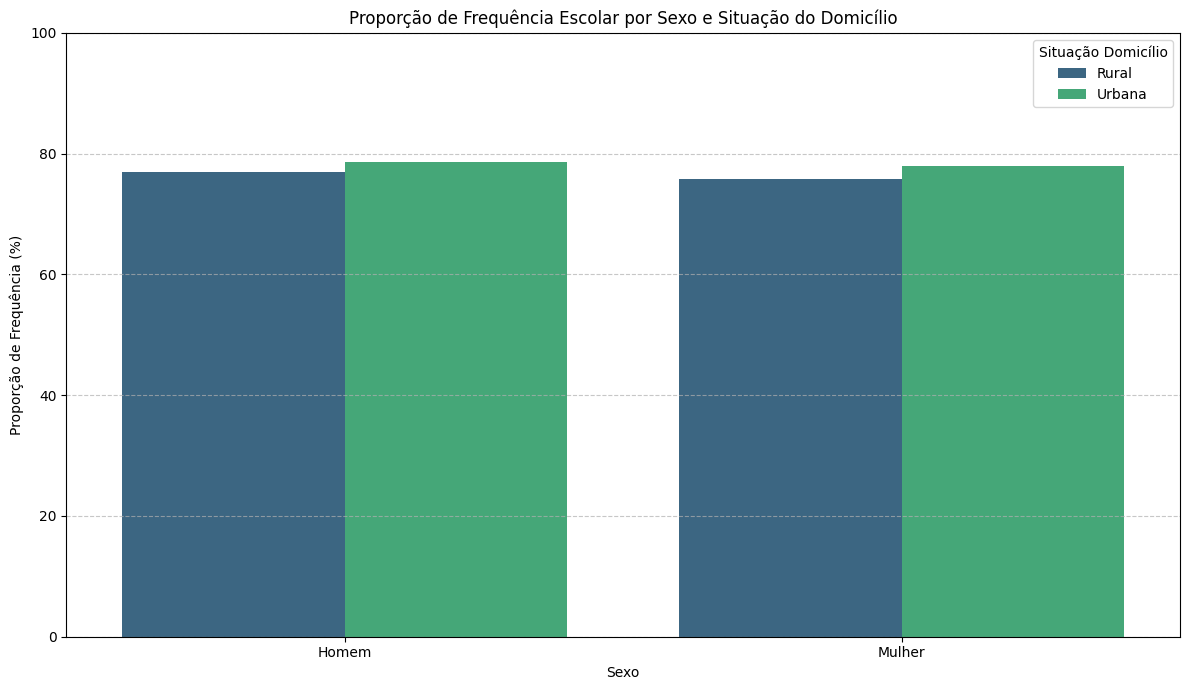

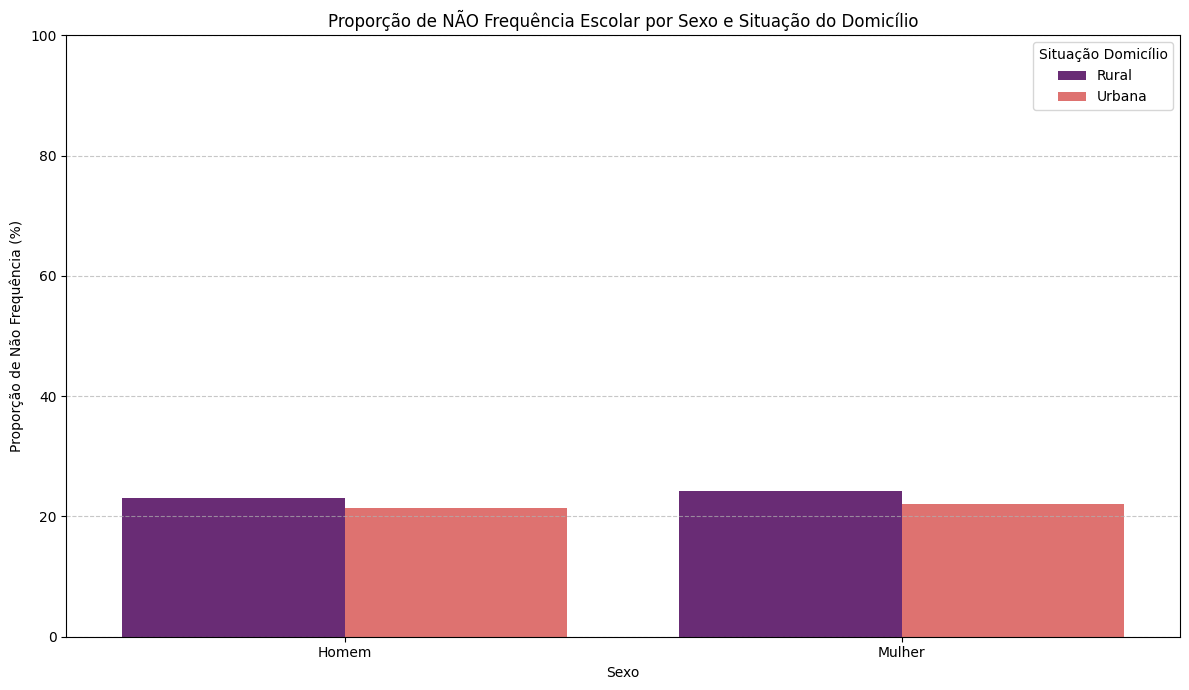

Tabela de Proporções (%):
frequenta_escola    sexo situacao_domicilio  NFrequenta  Frequenta  Total
0                  Homem              Rural   23.060930  76.939070  100.0
1                  Homem             Urbana   21.411486  78.588514  100.0
2                 Mulher              Rural   24.156269  75.843731  100.0
3                 Mulher             Urbana   22.053224  77.946776  100.0


In [ ]:
contagem_sexo_domicilio = (
    dataset_original
    .groupby(['sexo', 'situacao_domicilio', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
)

contagem_sexo_domicilio = contagem_sexo_domicilio.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
})

contagem_sexo_domicilio['Total'] = contagem_sexo_domicilio['Frequenta'] + contagem_sexo_domicilio['NFrequenta']

contagem_sexo_domicilio_perc = contagem_sexo_domicilio.div(contagem_sexo_domicilio['Total'], axis=0) * 100

contagem_sexo_domicilio_perc = contagem_sexo_domicilio_perc.reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(
    x='sexo',
    y='Frequenta',
    hue='situacao_domicilio',
    data=contagem_sexo_domicilio_perc,
    palette='viridis'
)
plt.title('Proporção de Frequência Escolar por Sexo e Situação do Domicílio')
plt.xlabel('Sexo')
plt.ylabel('Proporção de Frequência (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Situação Domicílio')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(
    x='sexo',
    y='NFrequenta',
    hue='situacao_domicilio',
    data=contagem_sexo_domicilio_perc,
    palette='magma'
)
plt.title('Proporção de NÃO Frequência Escolar por Sexo e Situação do Domicílio')
plt.xlabel('Sexo')
plt.ylabel('Proporção de Não Frequência (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Situação Domicílio')
plt.tight_layout()
plt.show()

print("Tabela de Proporções (%):")
print(contagem_sexo_domicilio_perc)


1. Frequência Geral Predominante: Em todos os grupos (homens/mulheres em áreas rurais/urbanas), a frequência escolar é o padrão predominante, com a maioria dos indivíduos frequentando a escola.

2. Impacto da Situação do Domicílio:

    * Áreas Rurais: Tanto para homens quanto para mulheres em áreas rurais, a proporção de não frequência é maior em comparação com suas contrapartes em áreas urbanas. Para mulheres em áreas rurais, a não frequência atinge 24.16%, sendo a maior proporção observada.
    * Áreas Urbanas: A não frequência é menor em ambientes urbanos. Homens em áreas urbanas têm a menor proporção de não frequência (21.41%).
3. Impacto do Gênero:

    * Mulheres: Em ambos os ambientes (rural e urbano), as mulheres apresentam uma proporção de não frequência ligeiramente superior ou muito próxima à dos homens. A diferença é mais notável no ambiente rural.
    * Homens: Homens em áreas urbanas são o grupo com a menor proporção de não frequência, indicando que este pode ser o grupo com maior facilidade ou menos barreiras para a permanência escolar.
4. Desafios Combinados: O grupo mais vulnerável à não frequência escolar é o das mulheres que residem em áreas rurais, com quase um quarto delas não frequentando a escola. Isso sugere que a interseção de gênero e local de residência cria desafios adicionais.

###7.6 - Proporção de Frequência e Não Frequência na Escola por Raça e Situação do Domicílio

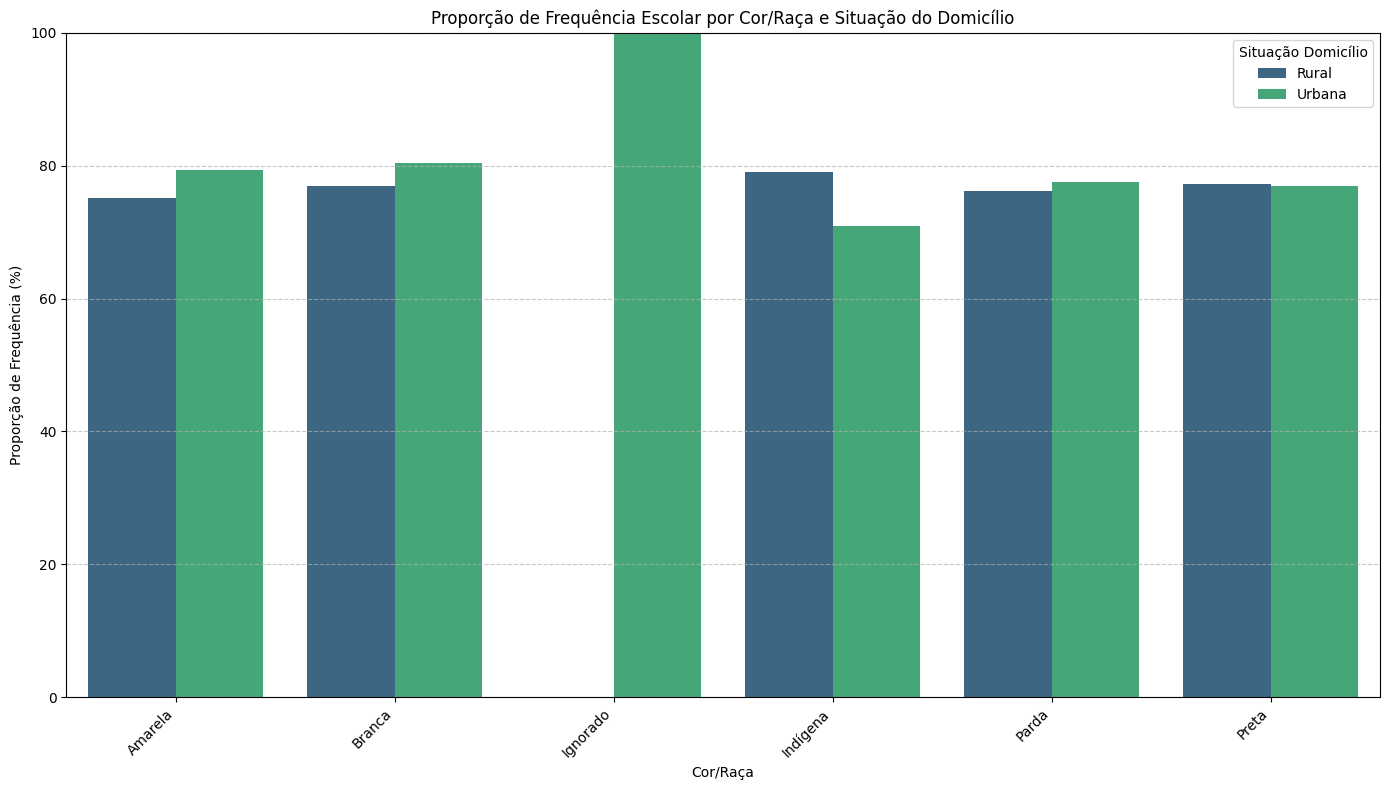

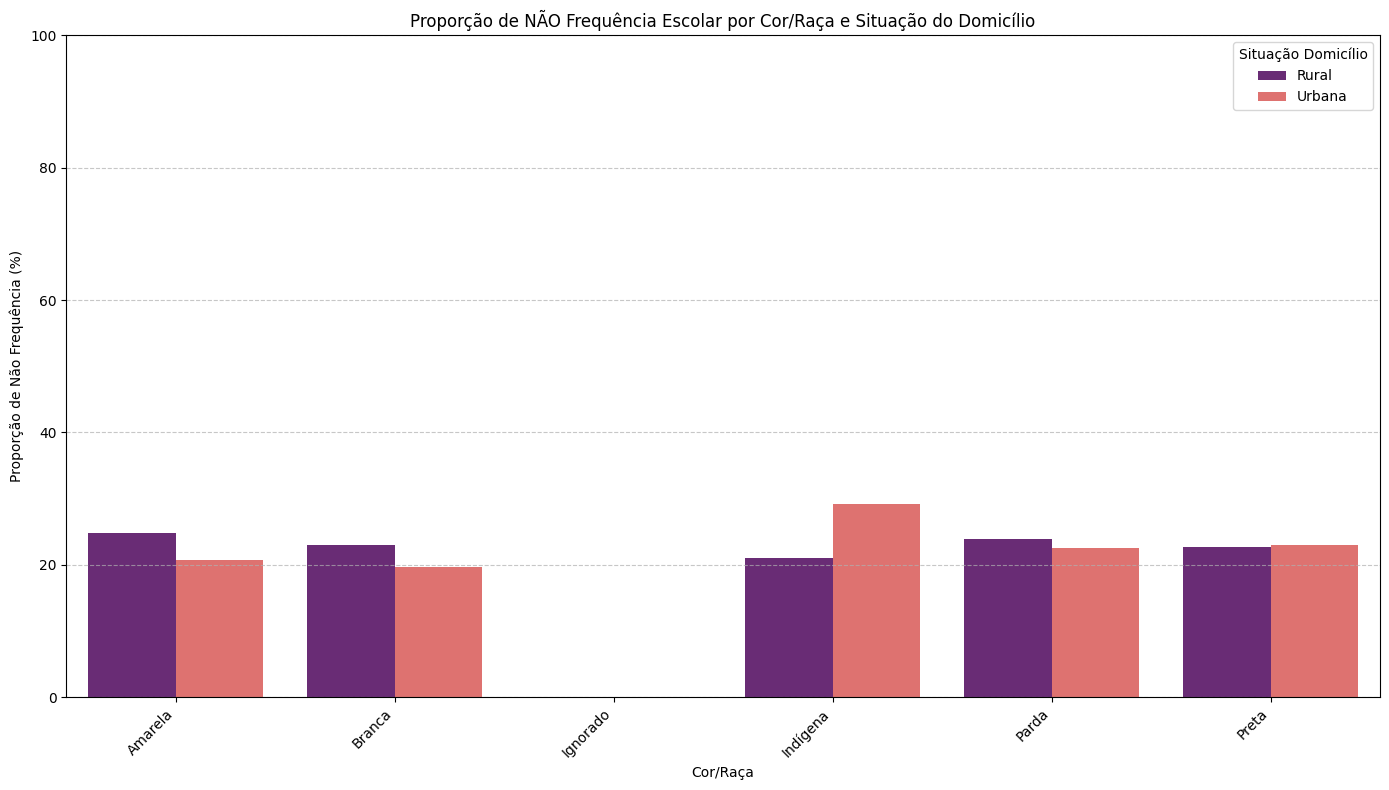

Tabela de Proporções (%):
frequenta_escola  cor_raca situacao_domicilio  NFrequenta   Frequenta  Total
0                  Amarela              Rural   24.800000   75.200000  100.0
1                  Amarela             Urbana   20.643432   79.356568  100.0
2                   Branca              Rural   23.021710   76.978290  100.0
3                   Branca             Urbana   19.660981   80.339019  100.0
4                 Ignorado             Urbana    0.000000  100.000000  100.0
5                 Indígena              Rural   20.959596   79.040404  100.0
6                 Indígena             Urbana   29.113924   70.886076  100.0
7                    Parda              Rural   23.874865   76.125135  100.0
8                    Parda             Urbana   22.522889   77.477111  100.0
9                    Preta              Rural   22.749346   77.250654  100.0
10                   Preta             Urbana   23.015116   76.984884  100.0


In [ ]:
contagem_raca_domicilio = (
    dataset_original
    .groupby(['cor_raca', 'situacao_domicilio', 'frequenta_escola'])
    .size()
    .unstack(fill_value=0)
)

contagem_raca_domicilio = contagem_raca_domicilio.rename(columns={
    1: 'Frequenta',
    0: 'NFrequenta'
})

contagem_raca_domicilio['Total'] = contagem_raca_domicilio['Frequenta'] + contagem_raca_domicilio['NFrequenta']

contagem_raca_domicilio_perc = contagem_raca_domicilio.div(contagem_raca_domicilio['Total'], axis=0) * 100

contagem_raca_domicilio_perc = contagem_raca_domicilio_perc.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    x='cor_raca',
    y='Frequenta',
    hue='situacao_domicilio',
    data=contagem_raca_domicilio_perc,
    palette='viridis'
)
plt.title('Proporção de Frequência Escolar por Cor/Raça e Situação do Domicílio')
plt.xlabel('Cor/Raça')
plt.ylabel('Proporção de Frequência (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Situação Domicílio')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(
    x='cor_raca',
    y='NFrequenta',
    hue='situacao_domicilio',
    data=contagem_raca_domicilio_perc,
    palette='magma'
)
plt.title('Proporção de NÃO Frequência Escolar por Cor/Raça e Situação do Domicílio')
plt.xlabel('Cor/Raça')
plt.ylabel('Proporção de Não Frequência (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Situação Domicílio')
plt.tight_layout()
plt.show()

print("Tabela de Proporções (%):")
print(contagem_raca_domicilio_perc)

1. Frequência Geral Predominante: Assim como nos outros análises, a frequência escolar é o padrão na maioria dos grupos raciais e situações de domicílio. Isso indica que, de modo geral, a maior parte dos adolescentes nessa faixa etária está na escola.

2. Variabilidade entre Grupos Étnicos:

    * Indígenas Urbanos: Este grupo apresenta a maior proporção de NÃO frequência escolar (29.11%). Isso sugere desafios significativos para estudantes indígenas em áreas urbanas, possivelmente relacionados a adaptação, acesso ou permanência.
    * Amarelos Rurais: Também mostram uma proporção de não frequência relativamente alta (24.80%), indicando que estudantes de origem amarela em áreas rurais podem enfrentar barreiras específicas.
    * Pardos e Pretos: Em geral, tanto em áreas rurais quanto urbanas, as populações Parda e Preta apresentam proporções de não frequência que variam entre 22.5% e 23.8%, ligeiramente acima da média para alguns grupos.
    * Brancos Urbanos: Este grupo exibe a menor proporção de não frequência (19.66%), sugerindo que eles têm maior facilidade ou menos barreiras para a permanência escolar.
3. Impacto da Situação do Domicílio na Não Frequência:

    * Para a maioria dos grupos raciais (Amarela, Branca, Parda), a proporção de não frequência é maior em áreas rurais do que em áreas urbanas, confirmando a tendência observada na análise anterior.
    * No entanto, para o grupo Indígena, a proporção de não frequência é curiosamente maior em áreas urbanas (29.11%) do que em áreas rurais (20.96%). Isso pode indicar que o ambiente urbano apresenta desafios únicos para a população indígena, talvez relacionados à integração social, cultural ou econômica.

A complexidade da evasão escolar é influenciada pela interação de múltiplos fatores como raça e localização geográfica. As políticas públicas devem ser sensíveis a essas especificidades, direcionando esforços para os grupos e contextos mais vulneráveis.

###7.7 -Distribuição de Faixas Salariais por Cor/Raça

<Figure size 1600x900 with 0 Axes>

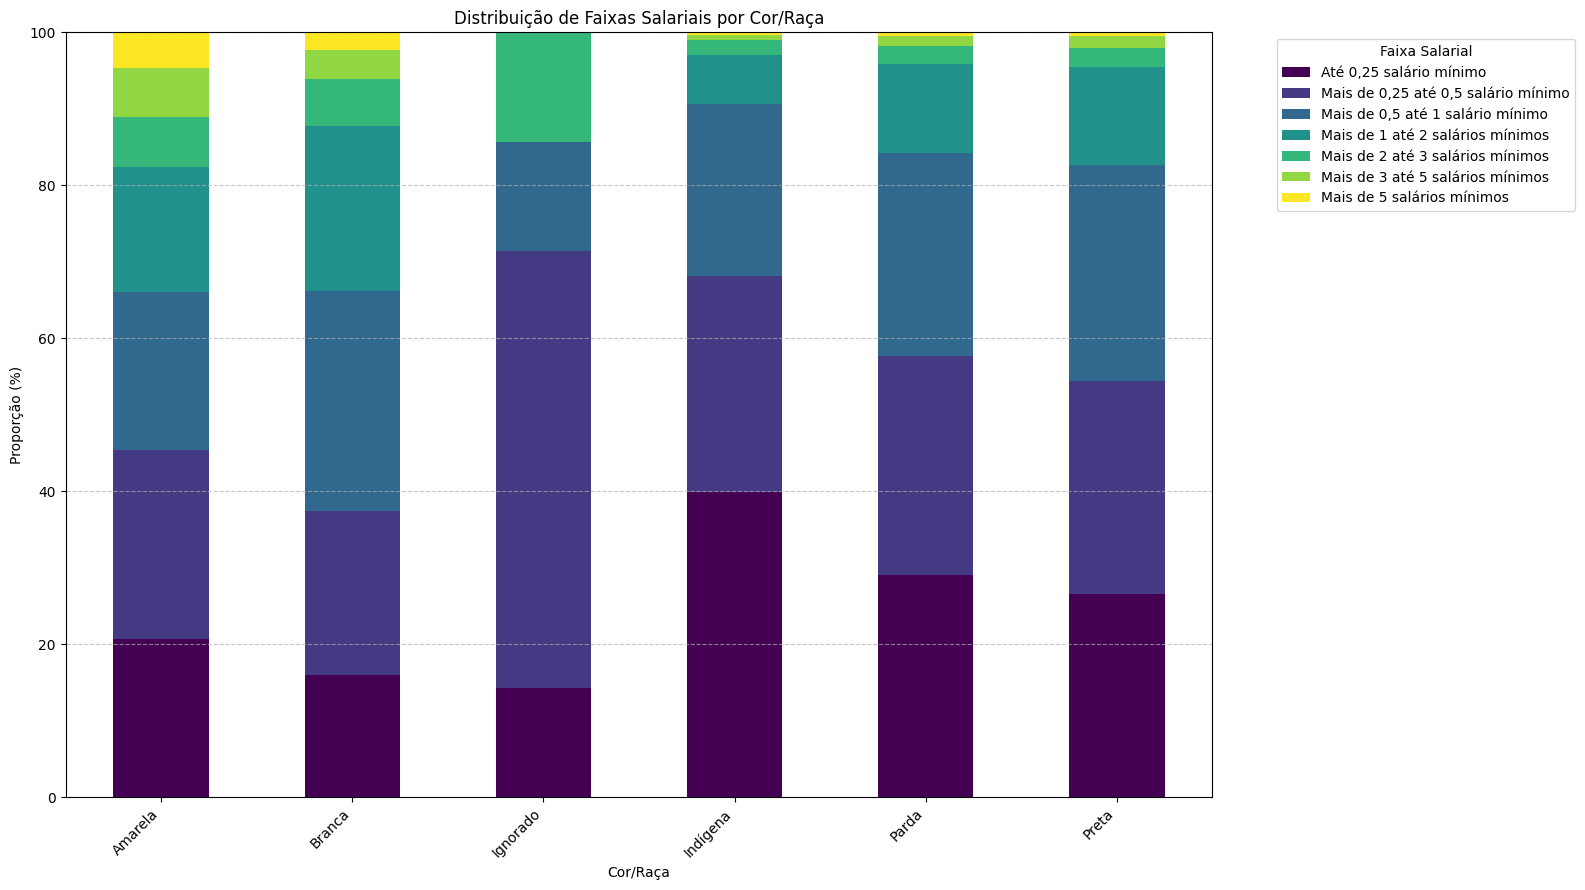

Tabela de Proporções (%):
faixa_salarial  Até 0,25 salário mínimo  Mais de 0,25 até 0,5 salário mínimo  \
cor_raca                                                                       
Amarela                       20.682731                            24.698795   
Branca                        15.919829                            21.488086   
Ignorado                      14.285714                            57.142857   
Indígena                      39.936776                            28.240253   
Parda                         28.993534                            28.674357   
Preta                         26.536926                            27.854291   

faixa_salarial  Mais de 0,5 até 1 salário mínimo  \
cor_raca                                           
Amarela                                20.682731   
Branca                                 28.781182   
Ignorado                               14.285714   
Indígena                               22.444679   
Parda                

In [ ]:
contagem_raca_renda_apenas = (
    dataset_original
    .groupby(['cor_raca', 'faixa_salarial'])
    .size()
    .unstack(fill_value=0)
)

contagem_raca_renda_apenas_perc = contagem_raca_renda_apenas.div(contagem_raca_renda_apenas.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 9))
contagem_raca_renda_apenas_perc.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 9))

plt.title('Distribuição de Faixas Salariais por Cor/Raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Proporção (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Faixa Salarial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Tabela de Proporções (%):")
print(contagem_raca_renda_apenas_perc)

#8 - Teste de Hipóteses

In [ ]:
db_renda = pd.read_csv("/content/drive/MyDrive/EBANX-AREE/dataset_renda_evasao.csv")
from scipy.stats import chi2_contingency

In [ ]:
## 1 - Setando Teste Qui-Quadrado.
dados = {
    'Renda': [
        'Até 0,25 salário mínimo',
        'Mais de 0,25 até 0,5 salário mínimo',
        'Mais de 0,5 até 1 salário mínimo',
        'Mais de 1 até 2 salários mínimos',
        'Mais de 2 até 3 salários mínimos',
        'Mais de 3 até 5 salários mínimos',
        'Mais de 5 salários mínimos'
    ],
    'Frequenta': [26199, 27902, 28453, 15621, 3968, 2361, 1204],
    'NFrequenta': [7918, 8179, 8607, 4226, 811, 409, 201]
}

dataset_contingencia = pd.DataFrame(dados)
dataset_contingencia.set_index('Renda', inplace=True)

print("Tabela de Contingência Observada:")
print(dataset_contingencia)
print("-" * 30)

# 2. Executando o Teste Qui-Quadrado
chi2, p_valor, graus_liberdade, esperados = chi2_contingency(dataset_contingencia)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-valor: {p_valor:.4e}") # Notação científica para facilitar leitura se for muito baixo
print(f"Graus de Liberdade: {graus_liberdade}")

print("-" * 30)
print("Interpretação:")
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos a hipótese nula (H0).")
    print("Existe uma associação estatisticamente significativa entre Renda e Frequência Escolar.")
else:
    print("Não rejeitamos a hipótese nula (H0).")
    print("Não há evidências suficientes para afirmar que existe associação entre as variáveis.")

Tabela de Contingência Observada:
                                     Frequenta  NFrequenta
Renda                                                     
Até 0,25 salário mínimo                  26199        7918
Mais de 0,25 até 0,5 salário mínimo      27902        8179
Mais de 0,5 até 1 salário mínimo         28453        8607
Mais de 1 até 2 salários mínimos         15621        4226
Mais de 2 até 3 salários mínimos          3968         811
Mais de 3 até 5 salários mínimos          2361         409
Mais de 5 salários mínimos                1204         201
------------------------------
Estatística Qui-Quadrado: 269.8325
P-valor: 2.3559e-55
Graus de Liberdade: 6
------------------------------
Interpretação:
Rejeitamos a hipótese nula (H0).
Existe uma associação estatisticamente significativa entre Renda e Frequência Escolar.


#9 - Regressão Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

target = "faixa_salarial"

df_ml = dataset_original.dropna(subset=[target])

X = dataset_original.drop(columns=[target])
y = dataset_original[target]

colunas_numericas = X.select_dtypes(include=["int64", "float64"]).columns
colunas_categoricas = X.select_dtypes(include=["object"]).columns

preprocessamento = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), colunas_numericas),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), colunas_categoricas)
    ]
)

modelo = Pipeline(steps=[
    ("prep", preprocessamento),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


print("ACURÁCIA:", accuracy_score(y_test, y_pred))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n")

relatorio = classification_report(
    y_test,
    y_pred,
    output_dict=True
)


print(f"{'Classe':45} {'Precisão':10} {'Revocação':10} {'F1-score':10} {'Total'}")
for classe, valores in relatorio.items():
    if classe in ["accuracy", "macro avg", "weighted avg"]:
        continue

    print(f"{classe:45} "
          f"{valores['precision']:.2f}       "
          f"{valores['recall']:.2f}       "
          f"{valores['f1-score']:.2f}       "
          f"{valores['support']}")


print("\n MÉDIAS")
print(f"Acurácia geral: {relatorio['accuracy']:.4f}")
print(f"Média Macro (F1): {relatorio['macro avg']['f1-score']:.4f}")
print(f"Média Ponderada (F1): {relatorio['weighted avg']['f1-score']:.4f}")


ACURÁCIA: 0.7530207261502279

RELATÓRIO DE CLASSIFICAÇÃO:

Classe                                        Precisão   Revocação  F1-score   Total
Até 0,25 salário mínimo                       0.78       0.81       0.80       8529.0
Mais de 0,25 até 0,5 salário mínimo           0.75       0.74       0.75       9020.0
Mais de 0,5 até 1 salário mínimo              0.73       0.78       0.76       9265.0
Mais de 1 até 2 salários mínimos              0.74       0.71       0.73       4962.0
Mais de 2 até 3 salários mínimos              0.77       0.55       0.64       1195.0
Mais de 3 até 5 salários mínimos              0.77       0.52       0.62       693.0
Mais de 5 salários mínimos                    0.77       0.56       0.65       351.0

 MÉDIAS
Acurácia geral: 0.7530
Média Macro (F1): 0.7046
Média Ponderada (F1): 0.7515


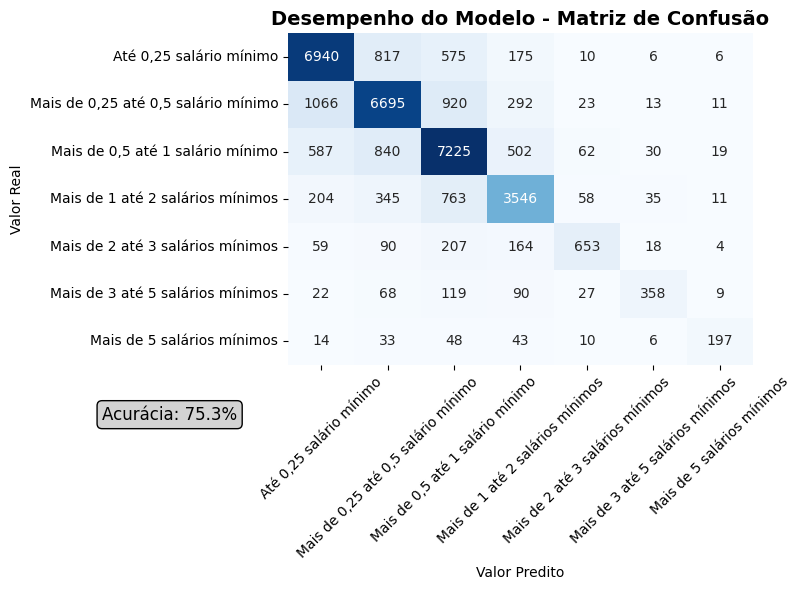

In [ ]:
## MATRIZ DA CONFUSÃO.

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y),
            cbar=False)

plt.title('Desempenho do Modelo - Matriz de Confusão', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adicionar acurácia no gráfico
acuracia = accuracy_score(y_test, y_pred)
plt.text(-0.4, -0.15, f'Acurácia: {acuracia:.1%}',
         ha='left', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()